In [6]:
#step1 Importing all necesary libraries
import numpy as np #linear algebra
import pandas as pd #data pocessing, csv file I/O(e.g pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#import os
#print(os.lstdir("../input"))

## DATA Preprocessing

In [7]:
#step2 
df = pd.read_csv('/home/jagdish/pytn/ml/Dset/train.csv')
test = pd.read_csv('/home/jagdish/pytn/ml/Dset/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
#step2.1 checking if there is any missing value
df.isnull().sum().max()


0

In [10]:
#checking number of columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Target Value Analysis**

In [11]:
#understanding the predicted value - which is hot encoded, in real life price won't be hot encoded.
df['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

In [13]:
df['price_range'].unique()

array([1, 2, 3, 0])

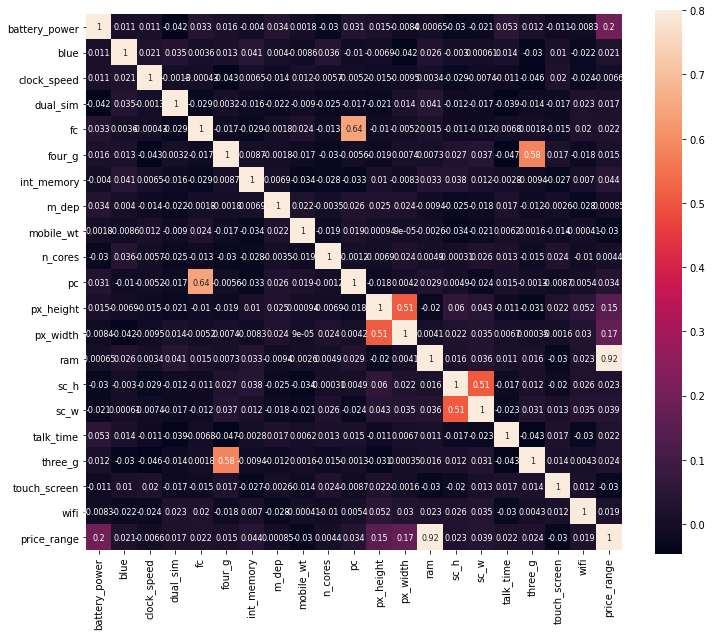

In [14]:
corrmat = df.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [18]:
y_t = np.array(df['price_range'])
xt = df
x_t =df.drop(['price_range'],axis=1)
x_t =np.array(x_t)

print("shape of Y:"+str(y_t.shape))
print("shape of x"+str(x_t.shape))

shape of Y:(2000,)
shape of x(2000, 20)


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_t =scaler.fit_transform(x_t)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_t, y_t, test_size=0.20, random_state=42)
print("shape of x train:"+str(X_train.shape))
print("shape of x test:"+str(X_test.shape))
print("shape of y train:"+str(y_train.shape))
print("shape of y test:"+str(y_test.shape))

shape of x train:(1600, 20)
shape of x test:(400, 20)
shape of y train:(1600,)
shape of y test:(400,)


In [28]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,y_train)
    scoretrain = clf.score(X_train,y_train)
    scoretest = clf.score(X_test,y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.953750 , Test Score: 0.960000 

Linear SVM value of C:3, training score :0.961875 , Test Score: 0.977500 

Linear SVM value of C:5, training score :0.968125 , Test Score: 0.975000 

Linear SVM value of C:10, training score :0.977500 , Test Score: 0.967500 

Linear SVM value of C:40, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:60, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:80, training score :0.981875 , Test Score: 0.970000 

Linear SVM value of C:100, training score :0.980625 , Test Score: 0.967500 



In [30]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,y_train)
scores = cross_val_score(clf1,X_train,y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))
#Loo = LeaveOneOut()
#Loo_scores = cross_val_score(clf1,X_train,Y_train,cv=Loo)
print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))
#print("The LeaveOneOut Cross Validation Score :"+str(Loo_scores))
#print("The Average LeaveOneOut Cross Validation Score :"+str(Loo_scores.mean()))

The Cross Validation Score :[0.95     0.9625   0.95     0.925    0.971875]
The Average Cross Validation Score :0.9518749999999999
The Stratified Cross Validation Score :[0.95625  0.95     0.94375  0.971875 0.94375 ]
The Average Stratified Cross Validation Score :0.953125


In [32]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=1,epsilon=.01).fit(X_train,y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,y_train)))

0.92 is the accuracy of the SV Regressor
